In [2]:
import sys
sys.path.append('..')
import numpy as np
from common.optimizer import SGD
from dataset import spiral
import matplotlib.pyplot as plt
from two_layer_net import TwoLayerNet

# Hyperparameters
max_epoch = 1000
batch_size = 30
hidden_size = 10
learning_rate = 1.0

x, t = spiral.load_data()
print(x.shape)
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

(300, 2)


In [3]:
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

print(max_epoch, batch_size, max_iters)

for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]

    for iters in range(max_iters):
        batch_x = x[iters*batch_size:(iters+1)*batch_size]
        batch_t = t[iters*batch_size:(iters+1)*batch_size]

        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)

        total_loss += loss
        loss_count += 1

    avg_loss = total_loss / loss_count
    print(f'| epoch {epoch+1} | loss {avg_loss:.2f}')
    loss_list.append(avg_loss)
    total_loss, loss_count = 0, 0

1000 30 10
| epoch 1 | loss 1.23
| epoch 2 | loss 1.09
| epoch 3 | loss 0.97
| epoch 4 | loss 0.89
| epoch 5 | loss 0.88
| epoch 6 | loss 0.83
| epoch 7 | loss 0.81
| epoch 8 | loss 0.78
| epoch 9 | loss 0.79
| epoch 10 | loss 0.80
| epoch 11 | loss 0.79
| epoch 12 | loss 0.78
| epoch 13 | loss 0.77
| epoch 14 | loss 0.75
| epoch 15 | loss 0.79
| epoch 16 | loss 0.75
| epoch 17 | loss 0.74
| epoch 18 | loss 0.73
| epoch 19 | loss 0.75
| epoch 20 | loss 0.74
| epoch 21 | loss 0.75
| epoch 22 | loss 0.73
| epoch 23 | loss 0.74
| epoch 24 | loss 0.76
| epoch 25 | loss 0.75
| epoch 26 | loss 0.72
| epoch 27 | loss 0.74
| epoch 28 | loss 0.74
| epoch 29 | loss 0.72
| epoch 30 | loss 0.70
| epoch 31 | loss 0.72
| epoch 32 | loss 0.70
| epoch 33 | loss 0.72
| epoch 34 | loss 0.70
| epoch 35 | loss 0.74
| epoch 36 | loss 0.68
| epoch 37 | loss 0.68
| epoch 38 | loss 0.67
| epoch 39 | loss 0.66
| epoch 40 | loss 0.67
| epoch 41 | loss 0.69
| epoch 42 | loss 0.69
| epoch 43 | loss 0.64
| epoch 4

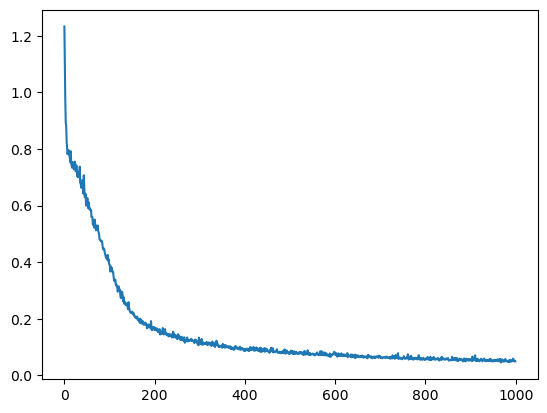

In [4]:
# Plot loss
plt.plot(np.arange(len(loss_list)), loss_list, label='train')

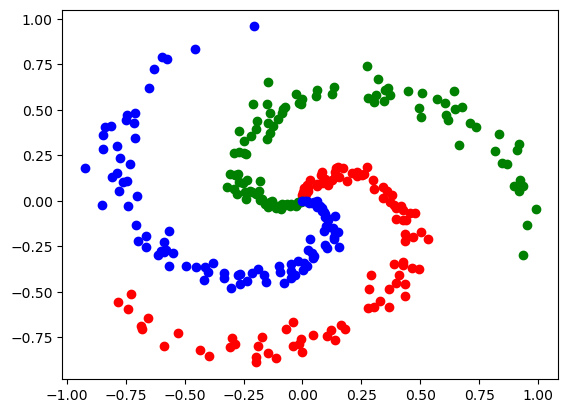

In [5]:
# Plot dataset
# x, t = spiral.load_data()

plt.plot(x[t[:, 0] == 1, 0], x[t[:, 0] == 1, 1], 'ro')
plt.plot(x[t[:, 1] == 1, 0], x[t[:, 1] == 1, 1], 'go')
plt.plot(x[t[:, 2] == 1, 0], x[t[:, 2] == 1, 1], 'bo')

(300, 3)


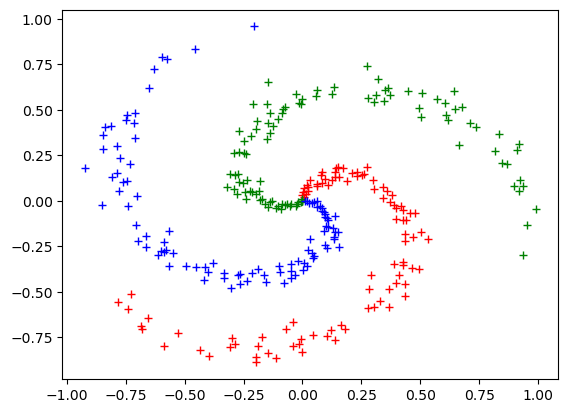

In [6]:
# Plot prediction
y = model.predict(x)

plt.plot(x[np.argmax(y, axis=1) == 0, 0], x[np.argmax(y, axis=1) == 0, 1], 'r+')
plt.plot(x[np.argmax(y, axis=1) == 1, 0], x[np.argmax(y, axis=1) == 1, 1], 'g+')
plt.plot(x[np.argmax(y, axis=1) == 2, 0], x[np.argmax(y, axis=1) == 2, 1], 'b+')

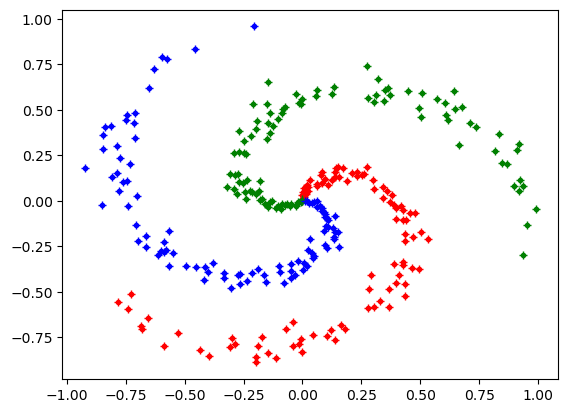

In [11]:

plt.plot(x[t[:, 0] == 1, 0], x[t[:, 0] == 1, 1], 'r.')
plt.plot(x[t[:, 1] == 1, 0], x[t[:, 1] == 1, 1], 'g.')
plt.plot(x[t[:, 2] == 1, 0], x[t[:, 2] == 1, 1], 'b.')

plt.plot(x[np.argmax(y, axis=1) == 0, 0], x[np.argmax(y, axis=1) == 0, 1], 'r+')
plt.plot(x[np.argmax(y, axis=1) == 1, 0], x[np.argmax(y, axis=1) == 1, 1], 'g+')
plt.plot(x[np.argmax(y, axis=1) == 2, 0], x[np.argmax(y, axis=1) == 2, 1], 'b+')